In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('insurance_data.csv', sep = ';')
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
0,1,F,0.0,Yes,Yes,23,Yes,No,No,NaN,12.0,Yes,"19,65","451,55",Y
1,2,F,1.0,No,No,42,Yes,Yes,Class A,3,1.0,Yes,"84,65","3541,35",N
2,3,F,0.0,Yes,No,72,Yes,No,No,NaN,12.0,No,"19,4","1496,45",Y
3,4,F,0.0,Yes,Yes,13,Yes,No,No,NaN,12.0,No,"19,55","265,3",Y
4,5,F,0.0,No,No,37,Yes,Yes,Class A,"3,4",1.0,No,"100,3","3541,4",Y


In [3]:
df.info() #We have null values in gender, is45OrOlder, premiumFrequency 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   insuree#                  5500 non-null   int64  
 1   gender                    5387 non-null   object 
 2   is45OrOlder               5404 non-null   float64
 3   isMarried                 5500 non-null   object 
 4   hasKids                   5500 non-null   object 
 5   insuredMonths             5500 non-null   int64  
 6   termLifeInsurance         5500 non-null   object 
 7   multipleTermLifePolicies  5500 non-null   object 
 8   healthInsurance           5500 non-null   object 
 9   healthRiders              3518 non-null   object 
 10  premiumFrequency          5386 non-null   float64
 11  eStatements               5500 non-null   object 
 12  monthlyPremium            5500 non-null   object 
 13  totalPremium              5500 non-null   object 
 14  renewal 

In [4]:
df.describe(include = 'all')

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
count,5500.000000,5387,5404.000000,5500,5500,5500.000000,5500,5500,5500,3518,5386.000000,5500,5500,5500,5500
unique,NaN,2,NaN,2,2,NaN,2,4,3,15,NaN,2,1524,5174,2
top,NaN,M,NaN,No,No,NaN,Yes,No,Class A,"3,4",NaN,Yes,"20,05","20,2",Y
freq,NaN,2719,NaN,2843,3857,NaN,4969,2654,2419,474,NaN,3225,49,10,4023
mean,2750.500000,NaN,0.162657,NaN,NaN,34.678909,NaN,NaN,NaN,NaN,4.086892,NaN,NaN,NaN,NaN
std,1587.857571,NaN,0.369087,NaN,NaN,42.225326,NaN,NaN,NaN,NaN,4.548742,NaN,NaN,NaN,NaN
min,1.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,1375.750000,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,2750.500000,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,4125.250000,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN


## Data Cleaning

##### Notes for data cleaning
1. Null values in gender, is45OrOlder, preniunFrequency, healthRiders
2. Most of the variables are in string format, need to change to proper categorical 
3. monthlyPremium and totalPremium are in string format instead of numerics 
4. multipleTermLifePolicies has some extra variables, need to inspect the relationship
5. healthInsurance is multi-class 


In [5]:
for column in ['gender', 'is45OrOlder', 'isMarried', 'hasKids', 'termLifeInsurance', 'multipleTermLifePolicies', 'healthInsurance', 'eStatements']:
    print(column, df[column].unique())

gender ['F' 'M' nan]
is45OrOlder [ 0.  1. nan]
isMarried ['Yes' 'No']
hasKids ['Yes' 'No']
termLifeInsurance ['Yes' 'No']
multipleTermLifePolicies ['No' 'Yes' 'no term life policy taken' 'term life policy not taken']
healthInsurance ['No' 'Class A' 'Class B']
eStatements ['Yes' 'No']


In [6]:
df.duplicated().any() #No duplicate rows in the dataframe

False

In [7]:
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
0,1,F,0.0,Yes,Yes,23,Yes,No,No,NaN,12.0,Yes,"19,65","451,55",Y
1,2,F,1.0,No,No,42,Yes,Yes,Class A,3,1.0,Yes,"84,65","3541,35",N
2,3,F,0.0,Yes,No,72,Yes,No,No,NaN,12.0,No,"19,4","1496,45",Y
3,4,F,0.0,Yes,Yes,13,Yes,No,No,NaN,12.0,No,"19,55","265,3",Y
4,5,F,0.0,No,No,37,Yes,Yes,Class A,"3,4",1.0,No,"100,3","3541,4",Y


In [8]:
#Convert isMarried, hasKids, termLifeInsurance, eStatements, renewal to binary features 
df = pd.read_csv('insurance_data.csv', sep = ';')
df['isMarried'] = df['isMarried'].apply(lambda x: 1 if x == 'Yes' else 0)
df['hasKids'] = df['hasKids'].apply(lambda x: 1 if x == 'Yes' else 0)
df['termLifeInsurance'] = df['termLifeInsurance'].apply(lambda x: 1 if x == 'Yes' else 0)
df['eStatements'] =  df['eStatements'].apply(lambda x: 1 if x == 'Yes' else 0)
df['renewal'] = df['renewal'].apply(lambda x: 1 if x == 'Y' else 0)
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
0,1,F,0.0,1,1,23,1,No,No,NaN,12.0,1,"19,65","451,55",1
1,2,F,1.0,0,0,42,1,Yes,Class A,3,1.0,1,"84,65","3541,35",0
2,3,F,0.0,1,0,72,1,No,No,NaN,12.0,0,"19,4","1496,45",1
3,4,F,0.0,1,1,13,1,No,No,NaN,12.0,0,"19,55","265,3",1
4,5,F,0.0,0,0,37,1,Yes,Class A,"3,4",1.0,0,"100,3","3541,4",1


In [9]:
df[df['totalPremium'] == ' '] #Empty strings for totalPremium  => Set these values to 0 first 

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
22,23,M,0.0,1,1,0,1,No,No,NaN,3.0,1,"19,7",,1
99,100,M,0.0,1,1,0,1,Yes,No,NaN,12.0,0,"25,35",,1
1428,1429,F,0.0,1,1,0,1,No,Class B,"1,2,3,4",12.0,0,"80,85",,1
2411,2412,M,0.0,1,1,0,1,Yes,No,NaN,12.0,0,"25,75",,1
2643,2644,F,0.0,1,1,0,1,Yes,Class B,"2,3",12.0,0,"73,35",,1
3332,3333,M,0.0,0,1,0,1,No,No,NaN,12.0,0,"20,25",,1
4585,4586,M,0.0,0,1,0,1,Yes,Class B,"1,2",12.0,1,"61,9",,1
4611,4612,M,0.0,1,1,0,1,No,No,NaN,12.0,0,"19,85",,1
4915,4916,F,0.0,1,1,0,0,no term life policy taken,Class B,"1,3",12.0,1,"52,55",,1


In [10]:
#Now convert monthly premium and total premium to floats
df['monthlyPremium'] = df['monthlyPremium'].str.replace(",", '.')
df['totalPremium'] = df['totalPremium'].str.replace(",", '.')
df['totalPremium']  = df['totalPremium'].str.replace(" ", '0')
df['monthlyPremium'] = df['monthlyPremium'].astype('float')
df['totalPremium'] = df['totalPremium'].astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   insuree#                  5500 non-null   int64  
 1   gender                    5387 non-null   object 
 2   is45OrOlder               5404 non-null   float64
 3   isMarried                 5500 non-null   int64  
 4   hasKids                   5500 non-null   int64  
 5   insuredMonths             5500 non-null   int64  
 6   termLifeInsurance         5500 non-null   int64  
 7   multipleTermLifePolicies  5500 non-null   object 
 8   healthInsurance           5500 non-null   object 
 9   healthRiders              3518 non-null   object 
 10  premiumFrequency          5386 non-null   float64
 11  eStatements               5500 non-null   int64  
 12  monthlyPremium            5500 non-null   float64
 13  totalPremium              5500 non-null   float64
 14  renewal 

###### Remaining Data cleaning issues
1. Null values in gender and is45OrOlder and premiumFrequency
2. MultipleTermLifePolicies and healthRiders
3. Check totalPremium null values

## Exploratory Data Analysis


Before deciding on how to handle multipleTermLifePolicies and healthRiders, we need to first see their relationship with termLifeInsurance and healthInsurance. 

In [12]:
pd.DataFrame(df.groupby(['termLifeInsurance', 'multipleTermLifePolicies']).size())

0
termLifeInsurance multipleTermLifePolicies        
0                 no term life policy taken    497
                  term life policy not taken    34
1                 No                          2654
                  Yes                         2315

In [13]:
pd.DataFrame(df.groupby(['healthInsurance', 'healthRiders']).size())

0
healthInsurance healthRiders     
Class A         1              85
                1,2            67
                1,2,3          56
                1,2,3,4       213
                1,2,4          47
                1,3            30
                1,3,4         122
                1,4            31
                2             159
                2,3            89
                2,3,4         326
                2,4            89
                3             160
                3,4           365
                4             163
Class B         1             192
                1,2           180
                1,2,3          70
                1,2,3,4       161
                1,2,4          84
                1,3            56
                1,3,4         106
                1,4            64
                2             145
                2,3            50
                2,3,4         108
                2,4            44
                3              78
                3,4           109
                4              69

In [14]:
df[df['healthRiders'].isnull()].groupby('healthInsurance').size()

healthInsurance
Class A     417
Class B     356
No         1209
dtype: int64

From the above tables, we can come to 2 conclusions:
1. 'term life policy not taken' and 'no term life policy taken' can be treated the same as 'No' value in column multipleTermLifePolicies
2. For users with health insurance, they would have a health rider, but not all people with health insurance must have a rider 

We can treat multipleTermLifePolicies as a binary variable, and use one-hot encoding for healthRiders. We need to have 1 column per various healthRider option for a total of 4 different rider column options, since users can have any combination of the riders

In [15]:
df['multipleTermLifePolicies'] = df['multipleTermLifePolicies'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthInsurance,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal
0,1,F,0.0,1,1,23,1,0,No,NaN,12.0,1,19.65,451.55,1
1,2,F,1.0,0,0,42,1,1,Class A,3,1.0,1,84.65,3541.35,0
2,3,F,0.0,1,0,72,1,0,No,NaN,12.0,0,19.40,1496.45,1
3,4,F,0.0,1,1,13,1,0,No,NaN,12.0,0,19.55,265.30,1
4,5,F,0.0,0,0,37,1,1,Class A,"3,4",1.0,0,100.30,3541.40,1


In [16]:
#One hot encode healthInsurance column
#Drop 'No' level to prevent correlation issues
df = pd.get_dummies(df, columns = ['healthInsurance']).drop('healthInsurance_No', axis = 1).copy() 

In [17]:
rider_1 = []
rider_2 = []
rider_3 = []
rider_4 = []
for row in df.itertuples():
    healthRiderIndex = df.columns.get_loc('healthRiders') + 1
    healthRiders = row[healthRiderIndex]
    if type(healthRiders) != str:#Null value
        rider_1.append(0)
        rider_2.append(0)        
        rider_3.append(0)
        rider_4.append(0)
    else:
        healthRiders = healthRiders.split(',')
        remaining = set([1,2,3,4])
        for val in healthRiders:
            if int(val) == 1:
                rider_1.append(1)
                remaining.remove(1)
            elif int(val) == 2:
                rider_2.append(1)
                remaining.remove(2)
            elif int(val) == 3:
                rider_3.append(1)
                remaining.remove(3)
            elif int(val) == 4:
                rider_4.append(1)    
                remaining.remove(4)
            else:
                raise ValueError('Unaccounted variable')
        for remaining in remaining:
            if remaining == 1:
                rider_1.append(0)
            elif remaining == 2:
                rider_2.append(0)
            elif remaining == 3:                
                rider_3.append(0)
            elif remaining == 4:
                rider_4.append(0)

df.head()


,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,healthRiders,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal,healthInsurance_Class A,healthInsurance_Class B
0,1,F,0.0,1,1,23,1,0,NaN,12.0,1,19.65,451.55,1,0,0
1,2,F,1.0,0,0,42,1,1,3,1.0,1,84.65,3541.35,0,1,0
2,3,F,0.0,1,0,72,1,0,NaN,12.0,0,19.40,1496.45,1,0,0
3,4,F,0.0,1,1,13,1,0,NaN,12.0,0,19.55,265.30,1,0,0
4,5,F,0.0,0,0,37,1,1,"3,4",1.0,0,100.30,3541.40,1,1,0


In [18]:
df['healthRider_1'] = rider_1
df['healthRider_2'] = rider_2
df['healthRider_3'] = rider_3
df['healthRider_4'] = rider_4
df.drop('healthRiders', axis = 1, inplace = True)

In [19]:
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal,healthInsurance_Class A,healthInsurance_Class B,healthRider_1,healthRider_2,healthRider_3,healthRider_4
0,1,F,0.0,1,1,23,1,0,12.0,1,19.65,451.55,1,0,0,0,0,0,0
1,2,F,1.0,0,0,42,1,1,1.0,1,84.65,3541.35,0,1,0,0,0,1,0
2,3,F,0.0,1,0,72,1,0,12.0,0,19.40,1496.45,1,0,0,0,0,0,0
3,4,F,0.0,1,1,13,1,0,12.0,0,19.55,265.30,1,0,0,0,0,0,0
4,5,F,0.0,0,0,37,1,1,1.0,0,100.30,3541.40,1,1,0,0,0,1,1


Text(0.5, 1.0, 'Count of renewals')

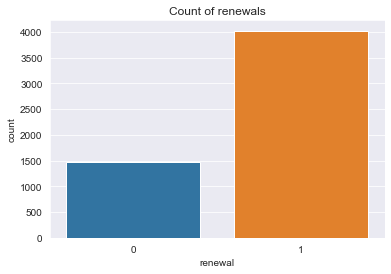

In [20]:
sns.countplot(data = df, x = 'renewal')
plt.title('Count of renewals')

40.48123291076311
18.874746106973596


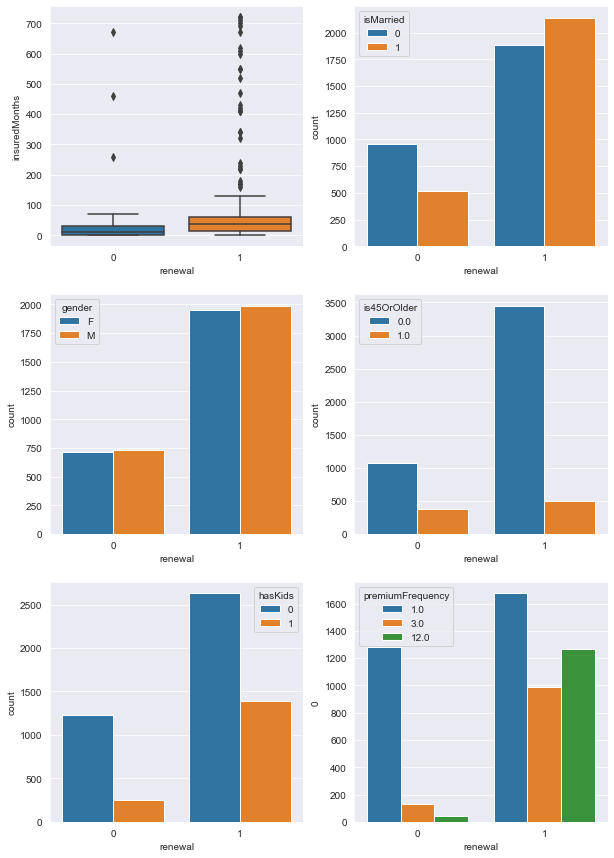

In [21]:
fig, ax = plt.subplots(3,2 , figsize = (10, 15))
sns.boxplot(ax = ax[0,0], data = df, x = 'renewal', y = 'insuredMonths')
sns.countplot(ax = ax[1,0], data = df, x = 'renewal', hue = 'gender')
sns.countplot(ax = ax[2,0], data = df, x = 'renewal', hue = 'hasKids')
sns.countplot(ax = ax[0,1], data = df, x = 'renewal', hue = 'isMarried')
sns.countplot(ax = ax[1,1], data = df, x = 'renewal', hue = 'is45OrOlder')
grouped_prem = pd.DataFrame(df.groupby(['renewal', 'premiumFrequency']).size()).reset_index()
sns.barplot(ax = ax[2,1],data = grouped_prem, x = 'renewal', y= 0, hue = 'premiumFrequency')
print(df[df['renewal'] == 1]['insuredMonths'].mean())
print(df[df['renewal'] == 0]['insuredMonths'].mean())



In [22]:
df['numRiders'] = df['healthRider_1'] + df['healthRider_2'] + df['healthRider_3'] + df['healthRider_4']
df['monthPremiumMonthInsured'] = df['monthlyPremium'] * df['insuredMonths']
df.head()

,insuree#,gender,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,premiumFrequency,eStatements,...,totalPremium,renewal,healthInsurance_Class A,healthInsurance_Class B,healthRider_1,healthRider_2,healthRider_3,healthRider_4,numRiders,monthPremiumMonthInsured
0,1,F,0.0,1,1,23,1,0,12.0,1,...,451.55,1,0,0,0,0,0,0,0,451.95
1,2,F,1.0,0,0,42,1,1,1.0,1,...,3541.35,0,1,0,0,0,1,0,1,3555.30
2,3,F,0.0,1,0,72,1,0,12.0,0,...,1496.45,1,0,0,0,0,0,0,0,1396.80
3,4,F,0.0,1,1,13,1,0,12.0,0,...,265.30,1,0,0,0,0,0,0,0,254.15
4,5,F,0.0,0,0,37,1,1,1.0,0,...,3541.40,1,1,0,0,0,1,1,2,3711.10


1.3912727272727272


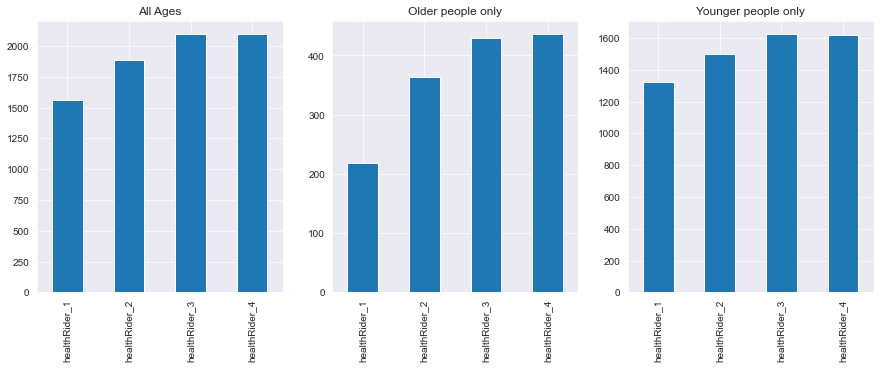

In [23]:
fig, ax = plt.subplots(1,3 , figsize = (15, 5))


df[['healthRider_1','healthRider_2','healthRider_3','healthRider_4']].sum().plot(kind = 'bar', ax = ax[0])
ax[0].title.set_text('All Ages')

df[df['is45OrOlder'] == 1][['healthRider_1','healthRider_2','healthRider_3','healthRider_4']].sum().plot(kind = 'bar', ax = ax[1])
ax[1].title.set_text('Older people only')

df[df['is45OrOlder'] == 0][['healthRider_1','healthRider_2','healthRider_3','healthRider_4']].sum().plot(kind = 'bar', ax = ax[2])
ax[2].title.set_text('Younger people only')


print(df['numRiders'].mean())

,insuredMonths,monthlyPremium,totalPremium,monthPremiumMonthInsured
insuredMonths,1.000000,0.019457,0.070517,0.137482
monthlyPremium,0.019457,1.000000,0.617800,0.883182
totalPremium,0.070517,0.617800,1.000000,0.710593
monthPremiumMonthInsured,0.137482,0.883182,0.710593,1.000000


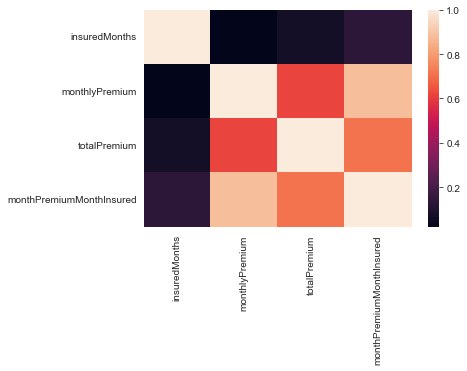

In [24]:
display(sns.heatmap(df[['insuredMonths', 'monthlyPremium', 'totalPremium', 'monthPremiumMonthInsured']].corr()))
df[['insuredMonths', 'monthlyPremium', 'totalPremium', 'monthPremiumMonthInsured']].corr()

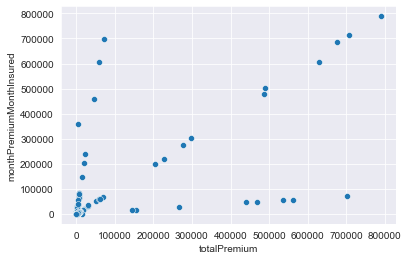

In [25]:
sns.scatterplot(data = df, x = 'totalPremium', y = 'monthPremiumMonthInsured')

In [26]:
df[abs(df['monthPremiumMonthInsured'] - df['totalPremium']) >= 1000][['monthlyPremium', 'totalPremium', 'insuredMonths', 'monthPremiumMonthInsured']]

,monthlyPremium,totalPremium,insuredMonths,monthPremiumMonthInsured
71,102.55,1742.50,170,17433.5
109,5395.00,23754.00,44,237380.0
273,9635.00,676695.00,71,684085.0
281,24.50,343.60,130,3185.0
284,19.70,804.25,410,8077.0
...,...,...,...,...
5110,25.00,3162.00,12,300.0
5122,8545.00,630085.00,71,606695.0
5202,243.00,3845.00,2,486.0
5443,81.25,580.10,70,5687.5


,insuredMonths,monthlyPremium,totalPremium,monthPremiumMonthInsured
insuredMonths,1.000000,0.019457,0.103623,0.137482
monthlyPremium,0.019457,1.000000,0.883872,0.883182
totalPremium,0.103623,0.883872,1.000000,0.998000
monthPremiumMonthInsured,0.137482,0.883182,0.998000,1.000000


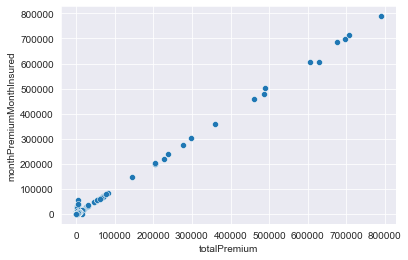

In [27]:
def fixTotalPremiums(row):
    if abs(row['totalPremium'] - row['monthPremiumMonthInsured']) >= 50000:
        return row['monthPremiumMonthInsured']
    else:
        return row['totalPremium']
    
df['totalPremium'] = df.apply(fixTotalPremiums, axis  = 1 )
display(sns.scatterplot(data = df, x = 'totalPremium', y = 'monthPremiumMonthInsured'))
df[['insuredMonths', 'monthlyPremium', 'totalPremium', 'monthPremiumMonthInsured']].corr()

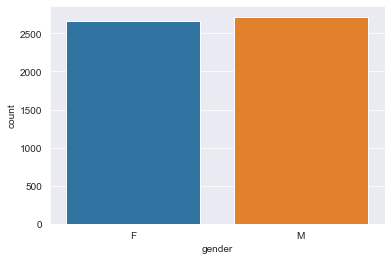

In [28]:
sns.countplot(data = df, x = 'gender')

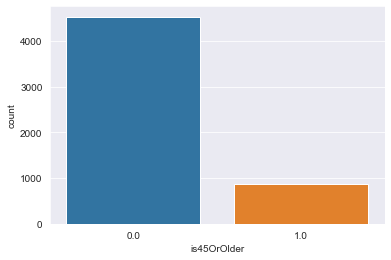

In [29]:
sns.countplot(data = df, x = 'is45OrOlder') #Most people are older 

1.646188850967008
1.3409944751381215


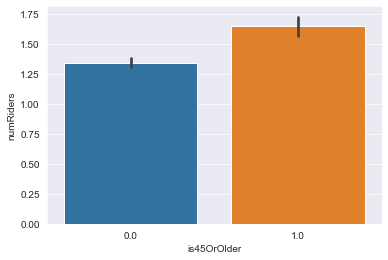

In [30]:
sns.barplot(data = df, x = 'is45OrOlder', y = 'numRiders')
print(df[df['is45OrOlder'] == 1]['numRiders'].mean())
print(df[df['is45OrOlder'] == 0]['numRiders'].mean())

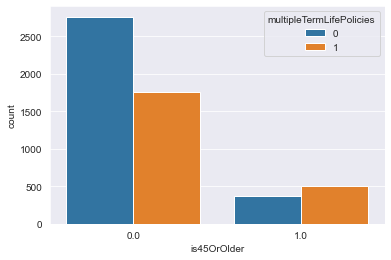

In [31]:
sns.countplot(data = df, x = 'is45OrOlder', hue = 'multipleTermLifePolicies')

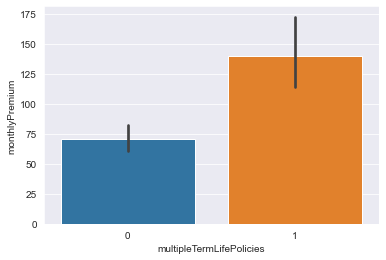

In [32]:
sns.barplot(data = df, x = 'multipleTermLifePolicies', y= 'monthlyPremium')

100.08916231667914
99.98276912660823


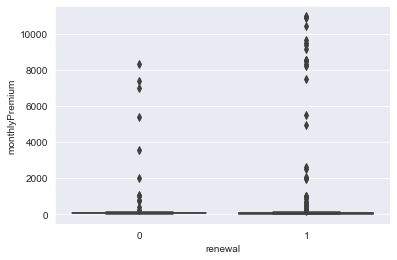

In [33]:
sns.boxplot(data = df, x = 'renewal', y= 'monthlyPremium')
print(df[df['renewal'] == 1]['monthlyPremium'].mean())
print(df[df['renewal'] == 0]['monthlyPremium'].mean())

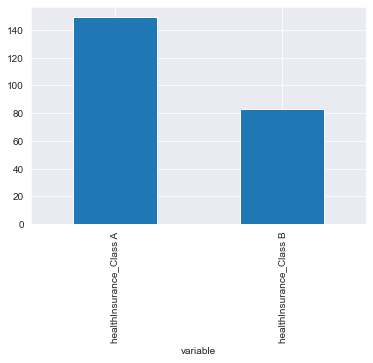

In [82]:
df_t = df[['monthlyPremium', 'healthInsurance_Class A', 'healthInsurance_Class B']].melt(id_vars = ['monthlyPremium']).copy()
df_t = df_t[df_t['value'] == 1]
df_t.groupby('variable')['monthlyPremium'].mean().plot(kind = 'bar')

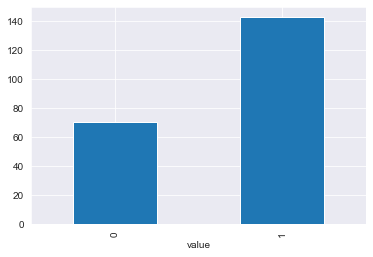

In [87]:
df_t = df[['monthlyPremium', 'multipleTermLifePolicies']].melt(id_vars = ['monthlyPremium']).copy()
# df_t = df_t[df_t['value'] == 1]
df_t.groupby('value')['monthlyPremium'].mean().plot(kind = 'bar')

From our data visualizations, we can make several interesting conclusions from the data given:
1. Gender does not seem to have much influence on whether people renew their insurance or not
2. Older people, being married and having kids has some relationship with renewal rates. 
    1. A higher proportion of people who renew their insurance have kids compared to people who dont renew their insurance
    2. A higher proportion of people who renew their insurance are married compared to people who dont renew their insurance
    3. A higher proportion of people who renew their insurance are younger compared to people who dont renew their insurance
3. The most popular is rider 4, followed by 3, 2 and 1 for both younger and older people
4. There are significanlty more people who renew their insurance compared to people who dont.
5. There is very high correlation between monthlyPremiums x monthsInsured and totalPremiums. 
6. For those rows with missing totalPremiums, their monthsInsured = 0, meaning that they have not paid any premiums thus far.
7. Majority of people who dont renew their insurance are actually paying monthly premiums, compared to those who do.
8. People who renew their insurance premiums tend to be insured for a more months.
9. On average, we can also see that people who have multiple term life policies tend to pay more, and people under health insurance A also tend to pay more. 
<br> <br>
We also believe that there is a set of outliers, with regard to monthlyPremiums, and totalPremiums. The value of total Premiums should be tied mostly to montly Premiums, but there are some rows where the difference can be up to hundreds of thousands.  In order to handle these outliers, for any significant differences between totalPremiums and monthlyPremiums x monthsInsured, we will set the totalPremiums value to the (monthlyPremiums x monthsInsured)

<br>
Therefore, before modelling our data, we make several decisions: <br>
1. Since age and premium_frequency is important, we will drop any missing rows rather than trying to impute them <br>
2. Since gender is even in this dataset has not much impact on renewal rates, we will drop gender from the data and ignore the null values present <br>
Since we still have 5291 rows compared to the original 5500, most of the original data was actually preserved and we should be okay to drop the missing rows

In [34]:
df.drop(['insuree#', 'gender', 'numRiders', 'monthPremiumMonthInsured'], axis = 1, inplace = True)
df.dropna(inplace = True)


In [35]:
df['is45OrOlder'] = df['is45OrOlder'].astype(int)
df['premiumFrequency'] = df['premiumFrequency'].astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5291 entries, 0 to 5499
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   is45OrOlder               5291 non-null   int32  
 1   isMarried                 5291 non-null   int64  
 2   hasKids                   5291 non-null   int64  
 3   insuredMonths             5291 non-null   int64  
 4   termLifeInsurance         5291 non-null   int64  
 5   multipleTermLifePolicies  5291 non-null   int64  
 6   premiumFrequency          5291 non-null   int32  
 7   eStatements               5291 non-null   int64  
 8   monthlyPremium            5291 non-null   float64
 9   totalPremium              5291 non-null   float64
 10  renewal                   5291 non-null   int64  
 11  healthInsurance_Class A   5291 non-null   uint8  
 12  healthInsurance_Class B   5291 non-null   uint8  
 13  healthRider_1             5291 non-null   int64  
 14  healthRi

In [37]:
df.reset_index(inplace = True, drop = True)
df.head()

,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,premiumFrequency,eStatements,monthlyPremium,totalPremium,renewal,healthInsurance_Class A,healthInsurance_Class B,healthRider_1,healthRider_2,healthRider_3,healthRider_4
0,0,1,1,23,1,0,12,1,19.65,451.55,1,0,0,0,0,0,0
1,1,0,0,42,1,1,1,1,84.65,3541.35,0,1,0,0,0,1,0
2,0,1,0,72,1,0,12,0,19.40,1496.45,1,0,0,0,0,0,0
3,0,1,1,13,1,0,12,0,19.55,265.30,1,0,0,0,0,0,0
4,0,0,0,37,1,1,1,0,100.30,3541.40,1,1,0,0,0,1,1


### Data modelling

We want to try to create a predictive model that can predict whether a person renews their insurance or not.

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold
import optuna
import xgboost

In [39]:
#Start with simpler model
#Go up to decision tree
#Do XGBoost, explain XAI tradeoff but show improvement in accuracy
#Badabing badaboom 

##### Logistic Regression

In [40]:
kf = KFold(n_splits = 5)
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []

for train_index, test_index in kf.split(df):
    X_train, Y_train = df.iloc[train_index].loc[:, df.columns != 'renewal'], df.iloc[train_index]['renewal'] 
    X_test, Y_test = df.iloc[test_index].loc[:, df.columns != 'renewal'], df.iloc[test_index]['renewal'] 
    clf = LogisticRegression(max_iter = 1000)
    clf.fit(X_train, Y_train)
    Y_preds = clf.predict(X_test)
    f1_scores.append(f1_score(Y_test, Y_preds))
    recall_scores.append(recall_score(Y_test, Y_preds))
    precision_scores.append(precision_score(Y_test, Y_preds))
    accuracy_scores.append(accuracy_score(Y_test, Y_preds))
    
print(f"F1 Scores per fold: {f1_scores}")
print(f"Recall Scores per fold: {recall_scores}")
print(f"Precision Scores per fold: {precision_scores}")
print(f"Accuracy Scores per fold: {accuracy_scores}")

print(" ")

print(f"Average F1 Score: {np.array(f1_scores).mean()}")
print(f"Average Recall Score: {np.array(recall_scores).mean()}")
print(f"Average Precision Score: {np.array(precision_scores).mean()}")
print(f"Average Accuracy Score: {np.array(accuracy_scores).mean()}")

F1 Scores per fold: [0.8789346246973365, 0.8529411764705882, 0.8690842040565457, 0.8544423440453686, 0.8710672424429364]
Recall Scores per fold: [0.9213197969543148, 0.8617571059431525, 0.91343669250646, 0.8956406869220608, 0.9074550128534704]
Precision Scores per fold: [0.8402777777777778, 0.8443037974683544, 0.8288393903868698, 0.8168674698795181, 0.8374851720047449]
Accuracy Scores per fold: [0.8111425873465533, 0.782608695652174, 0.7986767485822306, 0.781663516068053, 0.8024574669187146]
 
Average F1 Score: 0.8652939183425552
Average Recall Score: 0.8999218590358918
Average Precision Score: 0.8335547215034531
Average Accuracy Score: 0.7953098029135452


Logistic Regression does perform decently, giving us a average F1 score of 0.86529 on a 5-Fold cross-validation. One advantage of logistic regression is that we can interpret the weights. We will run logistic regression on the entire dataset and look at the coefficient, to identify what contributes to increasing the odds of an renewal.

In [41]:
clf = LogisticRegression(max_iter= 1000)
X, Y = df.loc[:, df.columns != 'renewal'], df['renewal']
clf.fit(X,Y)

LogisticRegression(max_iter=1000)

In [42]:
coefficients = pd.DataFrame(data = clf.coef_.squeeze() , index = clf.feature_names_in_)
coefficients['odds'] = np.exp(coefficients[0])
coefficients['probs'] = coefficients['odds']/ np.add(1, coefficients['odds'])
coefficients

,0,odds,probs
is45OrOlder,-0.306590,0.735952,0.423947
isMarried,0.111653,1.118124,0.527884
hasKids,0.300490,1.350521,0.574562
insuredMonths,0.033925,1.034507,0.508480
termLifeInsurance,0.282289,1.326162,0.570107
multipleTermLifePolicies,-0.370467,0.690412,0.408428
premiumFrequency,0.176338,1.192841,0.543971
eStatements,-0.354494,0.701528,0.412293
monthlyPremium,-0.000002,0.999998,0.500000
totalPremium,0.000004,1.000004,0.500001


Overall, looking at the results of the coefficients:
1. Being younger, married, and having kids increases the probability that the person will renew their insurance
2. Monthly premiums and total premiums seem to have no effect on whether a person will renew their insurance or not
3. People who buy health insurance A actually have a lower odds of renewal than people who dont buy any health insurance
4. People who purchase health Rider 1 would have higher odds of renewal compared to those who dont purchase rider 1. 

Since we have previously identifeid that monthlyPremium and totalPremium are highly correlated, we drop either one and see if there is a change in the cross validation results and any change in the coefficients

In [43]:
#Drop Monthly Premiums
kf = KFold(n_splits = 5)
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []

for train_index, test_index in kf.split(df):
    X_train, Y_train = df.iloc[train_index].loc[:, ~df.columns.isin(['renewal', 'monthlyPremium'])], df.iloc[train_index]['renewal'] 
    X_test, Y_test = df.iloc[test_index].loc[:, ~df.columns.isin(['renewal', 'monthlyPremium'])], df.iloc[test_index]['renewal'] 
    clf = LogisticRegression(max_iter = 1000)
    clf.fit(X_train, Y_train)
    Y_preds = clf.predict(X_test)
    f1_scores.append(f1_score(Y_test, Y_preds))
    recall_scores.append(recall_score(Y_test, Y_preds))
    precision_scores.append(precision_score(Y_test, Y_preds))
    accuracy_scores.append(accuracy_score(Y_test, Y_preds))
    
print(f"F1 Scores per fold: {f1_scores}")
print(f"Recall Scores per fold: {recall_scores}")
print(f"Precision Scores per fold: {precision_scores}")
print(f"Accuracy Scores per fold: {accuracy_scores}")

print(" ")

print(f"Average F1 Score: {np.array(f1_scores).mean()}")
print(f"Average Recall Score: {np.array(recall_scores).mean()}")
print(f"Average Precision Score: {np.array(precision_scores).mean()}")
print(f"Average Accuracy Score: {np.array(accuracy_scores).mean()}")

F1 Scores per fold: [0.8709677419354839, 0.8612143742255266, 0.8449781659388645, 0.8341597796143251, 0.8767627222562845]
Recall Scores per fold: [0.8908629441624365, 0.8979328165374677, 1.0, 1.0, 0.9190231362467867]
Precision Scores per fold: [0.8519417475728155, 0.8273809523809523, 0.7315689981096408, 0.7155009451795841, 0.8382180539273154]
Accuracy Scores per fold: [0.8035882908404155, 0.7882797731568998, 0.7315689981096408, 0.7155009451795841, 0.8100189035916824]
 
Average F1 Score: 0.857616556794097
Average Recall Score: 0.9415637793893381
Average Precision Score: 0.7929221394340616
Average Accuracy Score: 0.7697913821756445


In [44]:
clf = LogisticRegression(max_iter= 1000)
X, Y = df.loc[:, ~df.columns.isin(['renewal', 'monthlyPremium'])], df['renewal']
clf.fit(X,Y)

coefficients = pd.DataFrame(data = clf.coef_.squeeze() , index = clf.feature_names_in_)
coefficients['odds'] = np.exp(coefficients[0])
coefficients['probs'] = coefficients['odds']/ np.add(1, coefficients['odds'])
coefficients

,0,odds,probs
is45OrOlder,-0.295412,0.744225,0.426679
isMarried,0.108590,1.114705,0.527121
hasKids,0.294849,1.342924,0.573183
insuredMonths,0.034233,1.034826,0.508557
termLifeInsurance,0.273742,1.314875,0.568011
multipleTermLifePolicies,-0.369834,0.690849,0.408581
premiumFrequency,0.177369,1.194072,0.544226
eStatements,-0.340993,0.711064,0.415568
totalPremium,0.000004,1.000004,0.500001
healthInsurance_Class A,-0.765323,0.465183,0.317492


In [45]:
#Drop total Premiums
kf = KFold(n_splits = 5)
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []

for train_index, test_index in kf.split(df):
    X_train, Y_train = df.iloc[train_index].loc[:, ~df.columns.isin(['renewal', 'totalPremium'])], df.iloc[train_index]['renewal'] 
    X_test, Y_test = df.iloc[test_index].loc[:, ~df.columns.isin(['renewal', 'totalPremium'])], df.iloc[test_index]['renewal'] 
    clf = LogisticRegression(max_iter = 1000)
    clf.fit(X_train, Y_train)
    Y_preds = clf.predict(X_test)
    f1_scores.append(f1_score(Y_test, Y_preds))
    recall_scores.append(recall_score(Y_test, Y_preds))
    precision_scores.append(precision_score(Y_test, Y_preds))
    accuracy_scores.append(accuracy_score(Y_test, Y_preds))
    
print(f"F1 Scores per fold: {f1_scores}")
print(f"Recall Scores per fold: {recall_scores}")
print(f"Precision Scores per fold: {precision_scores}")
print(f"Accuracy Scores per fold: {accuracy_scores}")

print(" ")

print(f"Average F1 Score: {np.array(f1_scores).mean()}")
print(f"Average Recall Score: {np.array(recall_scores).mean()}")
print(f"Average Precision Score: {np.array(precision_scores).mean()}")
print(f"Average Accuracy Score: {np.array(accuracy_scores).mean()}")

F1 Scores per fold: [0.8826405867970659, 0.862918509159823, 0.869727047146402, 0.8587859424920128, 0.8758577666874611]
Recall Scores per fold: [0.916243654822335, 0.8824289405684754, 0.9056847545219638, 0.8877146631439894, 0.9023136246786633]
Precision Scores per fold: [0.8514150943396226, 0.8442521631644005, 0.8365155131264916, 0.8316831683168316, 0.850909090909091]
Accuracy Scores per fold: [0.8186968838526912, 0.7948960302457467, 0.8015122873345936, 0.7911153119092628, 0.8119092627599244]
 
Average F1 Score: 0.8699859704565529
Average Recall Score: 0.8988771275470853
Average Precision Score: 0.8429550059712874
Average Accuracy Score: 0.8036259552204438


In [46]:
clf = LogisticRegression(max_iter= 1000)
X, Y = df.loc[:, ~df.columns.isin(['renewal', 'totalPremium'])], df['renewal']
clf.fit(X,Y)

coefficients = pd.DataFrame(data = clf.coef_.squeeze() , index = clf.feature_names_in_)
coefficients['odds'] = np.exp(coefficients[0])
coefficients['probs'] = coefficients['odds']/ np.add(1, coefficients['odds'])
coefficients

,0,odds,probs
is45OrOlder,-0.310711,0.732926,0.422941
isMarried,0.060767,1.062652,0.515187
hasKids,0.227203,1.255085,0.556558
insuredMonths,0.033197,1.033754,0.508299
termLifeInsurance,0.641096,1.898561,0.655001
multipleTermLifePolicies,-0.344184,0.708798,0.414793
premiumFrequency,0.150633,1.162569,0.537587
eStatements,-0.366808,0.692942,0.409312
monthlyPremium,0.000117,1.000117,0.500029
healthInsurance_Class A,-1.780868,0.168492,0.144196


Comparing the results, we can see that by dropping totalPremiums, the performance of the model during the cross validation improves, achieving a F1 score of 0.87 compared to the original 0.865. By inspecting the coefficients, we can also observe a slight relationship, where an increase in monthly premiums slighly increases the odds of someone renewing a policy. Moving forward, for subsequent models, we will drop totalPremiums column.

In [94]:
df.drop('totalPremium', inplace = True, axis = 1)
df.head()

,is45OrOlder,isMarried,hasKids,insuredMonths,termLifeInsurance,multipleTermLifePolicies,premiumFrequency,eStatements,monthlyPremium,renewal,healthInsurance_Class A,healthInsurance_Class B,healthRider_1,healthRider_2,healthRider_3,healthRider_4
0,0,1,1,23,1,0,12,1,19.65,1,0,0,0,0,0,0
1,1,0,0,42,1,1,1,1,84.65,0,1,0,0,0,1,0
2,0,1,0,72,1,0,12,0,19.40,1,0,0,0,0,0,0
3,0,1,1,13,1,0,12,0,19.55,1,0,0,0,0,0,0
4,0,0,0,37,1,1,1,0,100.30,1,1,0,0,0,1,1


##### Decision Trees
Decision Trees might be able to perform slighlty better at the cost of some interpretability.

In [97]:
kf = KFold(n_splits = 5)
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []

for train_index, test_index in kf.split(df):
    X_train, Y_train = df.iloc[train_index].loc[:, df.columns != 'renewal'], df.iloc[train_index]['renewal'] 
    X_test, Y_test = df.iloc[test_index].loc[:, df.columns != 'renewal'], df.iloc[test_index]['renewal'] 
    clf = DecisionTreeClassifier(max_depth = 4)
    clf.fit(X_train, Y_train)
    Y_preds = clf.predict(X_test)
    f1_scores.append(f1_score(Y_test, Y_preds))
    recall_scores.append(recall_score(Y_test, Y_preds))
    precision_scores.append(precision_score(Y_test, Y_preds))
    accuracy_scores.append(accuracy_score(Y_test, Y_preds))
    
print(f"F1 Scores per fold: {f1_scores}")
print(f"Recall Scores per fold: {recall_scores}")
print(f"Precision Scores per fold: {precision_scores}")
print(f"Accuracy Scores per fold: {accuracy_scores}")

print(" ")

print(f"Average F1 Score: {np.array(f1_scores).mean()}")
print(f"Average Recall Score: {np.array(recall_scores).mean()}")
print(f"Average Precision Score: {np.array(precision_scores).mean()}")
print(f"Average Accuracy Score: {np.array(accuracy_scores).mean()}")

F1 Scores per fold: [0.8703030303030304, 0.8605625374027528, 0.8674985145573382, 0.8557025834908633, 0.8534954407294832]
Recall Scores per fold: [0.9111675126903553, 0.9289405684754521, 0.9431524547803618, 0.8969616908850726, 0.9023136246786633]
Precision Scores per fold: [0.8329466357308585, 0.8015607580824972, 0.8030803080308031, 0.8180722891566266, 0.8096885813148789]
Accuracy Scores per fold: [0.7979225684608121, 0.779773156899811, 0.7892249527410208, 0.7835538752362949, 0.7722117202268431]
 
Average F1 Score: 0.8615124212966936
Average Recall Score: 0.916507170301981
Average Precision Score: 0.8130697144631327
Average Accuracy Score: 0.7845372547129563


The results of a decision tree slighlty decreases significantly compared to a logistic regression, but slight improvement could be done if hyperparameter tuning is done. Use optuna to find the best set of hyperparameters with cross validation, maximizing for F1 score. This is because decision trees need to find optimal hyperparameters to prevent overfitting onto the training set.

In [48]:
#Decision Tree with hyperparameter tuning with grid search 
max_depths = [i for i in range(2, 6)]
min_samples_leafs = [i for i in range(1, 40)]
min_samples_split = [i for i in range(2, 40)]

best_params = {}
best_f1 = 0
for depth in max_depths:
    for leafs in min_samples_leafs:
        for split in min_samples_split:
            f1_scores = []
            kf = KFold(n_splits = 5)
            for train_index, test_index in kf.split(df):
                X_train, Y_train = df.iloc[train_index].loc[:, df.columns != 'renewal'], df.iloc[train_index]['renewal'] 
                X_test, Y_test = df.iloc[test_index].loc[:, df.columns != 'renewal'], df.iloc[test_index]['renewal'] 
                clf = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = leafs, min_samples_split = split)
                clf.fit(X_train, Y_train)
                Y_preds = clf.predict(X_test)
                f1_scores.append(f1_score(Y_test, Y_preds))
            if np.mean(f1_scores) > best_f1:
                best_f1 = np.mean(f1_scores)
                best_params['max_depth'] = depth
                best_params['min_samples_leafs'] =  leafs
                best_params['min_samples_split'] =  split
                print(f"New Best F1: {best_f1}")


2
New Best F1: 0.8338216541047277
3
New Best F1: 0.8669112012595077
4
5


In [98]:
kf = KFold(n_splits = 5)
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []

for train_index, test_index in kf.split(df):
    X_train, Y_train = df.iloc[train_index].loc[:, df.columns != 'renewal'], df.iloc[train_index]['renewal'] 
    X_test, Y_test = df.iloc[test_index].loc[:, df.columns != 'renewal'], df.iloc[test_index]['renewal'] 
    clf = DecisionTreeClassifier(max_depth = best_params['max_depth'], 
                            min_samples_leaf = best_params['min_samples_leafs'],
                            min_samples_split = best_params['min_samples_split'])
    clf.fit(X_train, Y_train)
    Y_preds = clf.predict(X_test)
    f1_scores.append(f1_score(Y_test, Y_preds))
    recall_scores.append(recall_score(Y_test, Y_preds))
    precision_scores.append(precision_score(Y_test, Y_preds))
    accuracy_scores.append(accuracy_score(Y_test, Y_preds))
    
print(f"F1 Scores per fold: {f1_scores}")
print(f"Recall Scores per fold: {recall_scores}")
print(f"Precision Scores per fold: {precision_scores}")
print(f"Accuracy Scores per fold: {accuracy_scores}")

print(" ")

print(f"Average F1 Score: {np.array(f1_scores).mean()}")
print(f"Average Recall Score: {np.array(recall_scores).mean()}")
print(f"Average Precision Score: {np.array(precision_scores).mean()}")
print(f"Average Accuracy Score: {np.array(accuracy_scores).mean()}")



F1 Scores per fold: [0.8805179517363154, 0.8600478468899521, 0.8674985145573382, 0.8550548112058465, 0.8714368819080862]
Recall Scores per fold: [0.949238578680203, 0.9289405684754521, 0.9431524547803618, 0.9273447820343461, 0.9627249357326478]
Precision Scores per fold: [0.8210757409440176, 0.8006681514476615, 0.8030803080308031, 0.7932203389830509, 0.79596174282678]
Accuracy Scores per fold: [0.8083097261567517, 0.77882797731569, 0.7892249527410208, 0.775047258979206, 0.7911153119092628]
 
Average F1 Score: 0.8669112012595077
Average Recall Score: 0.942280263940602
Average Precision Score: 0.8028012564464626
Average Accuracy Score: 0.7885050454203862


,0
is45OrOlder,0.000000
isMarried,0.000000
hasKids,0.000000
insuredMonths,0.176613
termLifeInsurance,0.000000
multipleTermLifePolicies,0.000000
premiumFrequency,0.625866
eStatements,0.000000
monthlyPremium,0.020296
healthInsurance_Class A,0.177225


[Text(0.5, 0.875, 'premiumFrequency <= 2.0\ngini = 0.393\nsamples = 5291\nvalue = [1420, 3871]'),
 Text(0.25, 0.625, 'healthInsurance_Class A <= 0.5\ngini = 0.491\nsamples = 2899\nvalue = [1255, 1644]'),
 Text(0.125, 0.375, 'insuredMonths <= 3.5\ngini = 0.408\nsamples = 1294\nvalue = [370, 924]'),
 Text(0.0625, 0.125, 'gini = 0.493\nsamples = 451\nvalue = [198, 253]'),
 Text(0.1875, 0.125, 'gini = 0.325\nsamples = 843\nvalue = [172, 671]'),
 Text(0.375, 0.375, 'insuredMonths <= 15.5\ngini = 0.495\nsamples = 1605\nvalue = [885, 720]'),
 Text(0.3125, 0.125, 'gini = 0.419\nsamples = 780\nvalue = [547, 233]'),
 Text(0.4375, 0.125, 'gini = 0.484\nsamples = 825\nvalue = [338, 487]'),
 Text(0.75, 0.625, 'monthlyPremium <= 93.675\ngini = 0.128\nsamples = 2392\nvalue = [165, 2227]'),
 Text(0.625, 0.375, 'premiumFrequency <= 7.5\ngini = 0.079\nsamples = 1806\nvalue = [74, 1732]'),
 Text(0.5625, 0.125, 'gini = 0.134\nsamples = 815\nvalue = [59, 756]'),
 Text(0.6875, 0.125, 'gini = 0.03\nsamples =

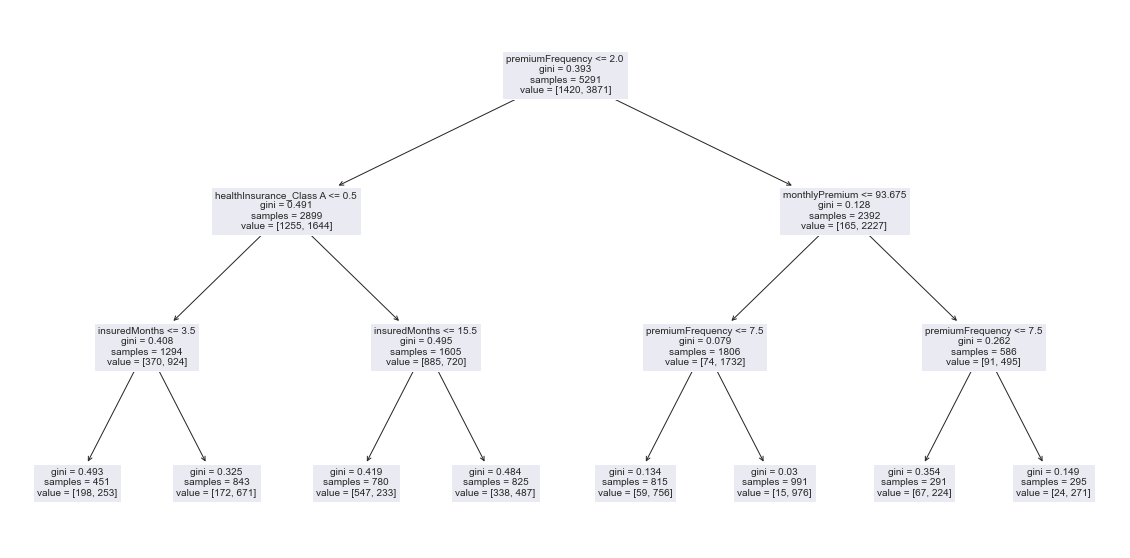

In [99]:
X,Y = df.loc[:, df.columns != 'renewal'], df['renewal']
clf = DecisionTreeClassifier(max_depth = best_params['max_depth'], 
                            min_samples_leaf = best_params['min_samples_leafs'],
                            min_samples_split = best_params['min_samples_split'])
clf.fit(X, Y)
feature_importances = pd.DataFrame(data = clf.feature_importances_ , index = clf.feature_names_in_)
display(feature_importances)
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names = clf.feature_names_in_, fontsize = 10)

From the above results, we can see that the decision tree classifier performs slightly worse than logistic regression, with a lower F1 score. By observing the feature importances and the plot of the tree, we can see that only 4 features are actually significant in splitting the tree, namely premiumFrequency, insuredMonths, monthlyPremiums and health insurance Class A. We take a look more into monthlyPremiums, since we had previously identified it as not having a important relationship with renewal rates.

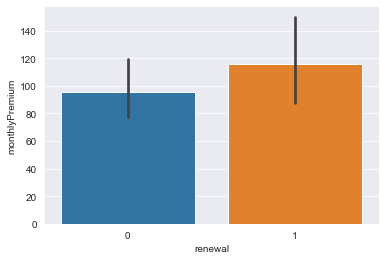

In [59]:
sns.barplot(data = df[(df['premiumFrequency'] <= 2)], x = 'renewal', y = 'monthlyPremium')
#From this, we can see that for those who pay their premiums monthly (<= 2), 
#Those who renew tend to have a higher monthly premium

##### XGBoost
Finally, we attempt to use gradient boosted trees, namely XGBoost, as these methods tend to provide good predictive result, at the cost of interpretability of variables. This model could be used if we want to have strong predictive power, without putting much importance on the reason for a prediction. <br> <br>

There is a large amount of variables for XGBoost, thus we use optuna in order to do hyperparameter tuning, instead of using a brute force gridsearch in order to reduce computational cost.

In [100]:
#Attempt without any hyperparameter tuning first
kf = KFold(n_splits = 5)
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []

for train_index, test_index in kf.split(df):
    X_train, Y_train = df.iloc[train_index].loc[:, df.columns != 'renewal'], df.iloc[train_index]['renewal'] 
    X_test, Y_test = df.iloc[test_index].loc[:, df.columns != 'renewal'], df.iloc[test_index]['renewal'] 
    clf = xgboost.XGBClassifier()
    clf.fit(X_train, Y_train)
    Y_preds = clf.predict(X_test)
    f1_scores.append(f1_score(Y_test, Y_preds))
    recall_scores.append(recall_score(Y_test, Y_preds))
    precision_scores.append(precision_score(Y_test, Y_preds))
    accuracy_scores.append(accuracy_score(Y_test, Y_preds))
    
print(f"F1 Scores per fold: {f1_scores}")
print(f"Recall Scores per fold: {recall_scores}")
print(f"Precision Scores per fold: {precision_scores}")
print(f"Accuracy Scores per fold: {accuracy_scores}")
print(" ")
print(f"Average F1 Score: {np.array(f1_scores).mean()}")
print(f"Average Recall Score: {np.array(recall_scores).mean()}")
print(f"Average Precision Score: {np.array(precision_scores).mean()}")
print(f"Average Accuracy Score: {np.array(accuracy_scores).mean()}")

F1 Scores per fold: [0.862133499688085, 0.8471781864299303, 0.8655409631019386, 0.8491048593350383, 0.8677839851024208]
Recall Scores per fold: [0.8769035532994924, 0.8630490956072352, 0.8940568475452196, 0.8771466314398944, 0.8984575835475579]
Precision Scores per fold: [0.8478527607361963, 0.8318804483188045, 0.8387878787878787, 0.8228004956629492, 0.8391356542617047]
Accuracy Scores per fold: [0.7913125590179415, 0.7722117202268431, 0.7967863894139886, 0.776937618147448, 0.7986767485822306]
 
Average F1 Score: 0.8583482987314828
Average Recall Score: 0.88192274228788
Average Precision Score: 0.8360914475535066
Average Accuracy Score: 0.7871850070776905


In [101]:
def objective(trial):
    kf = KFold(n_splits = 5)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 12)
    gamma = trial.suggest_float('gamma', 0.01, 2)
    learning_rate  = trial.suggest_float('learning_rate', 0.01, 0.3)
    f1_scores = []
    for train_index, test_index in kf.split(df):
        X_train, Y_train = df.iloc[train_index].loc[:, df.columns != 'renewal'], df.iloc[train_index]['renewal'] 
        X_test, Y_test = df.iloc[test_index].loc[:, df.columns != 'renewal'], df.iloc[test_index]['renewal'] 
        clf = xgboost.XGBClassifier(n_estimators = n_estimators,
                                   max_depth = max_depth,
                                   gamma = gamma,
                                   learning_rate = learning_rate)
        clf.fit(X_train, Y_train)
        Y_preds = clf.predict(X_test)
        f1_scores.append(f1_score(Y_test, Y_preds))
    return np.mean(f1_scores)
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100)

[I 2022-09-10 15:11:37,973] A new study created in memory with name: no-name-e3b5f1bd-fc39-4614-9f31-7b38859e56dd
[I 2022-09-10 15:11:45,799] Trial 0 finished with value: 0.8549136737738868 and parameters: {'n_estimators': 531, 'max_depth': 8, 'gamma': 0.18582080007100696, 'learning_rate': 0.10085808398968443}. Best is trial 0 with value: 0.8549136737738868.
[I 2022-09-10 15:11:47,559] Trial 1 finished with value: 0.870719980382978 and parameters: {'n_estimators': 146, 'max_depth': 5, 'gamma': 1.9219344712177835, 'learning_rate': 0.02592671181465453}. Best is trial 1 with value: 0.870719980382978.
[I 2022-09-10 15:11:51,394] Trial 2 finished with value: 0.8649159711482961 and parameters: {'n_estimators': 239, 'max_depth': 8, 'gamma': 1.8608754134633, 'learning_rate': 0.26393929394953436}. Best is trial 1 with value: 0.870719980382978.
[I 2022-09-10 15:12:06,687] Trial 3 finished with value: 0.8624874180485499 and parameters: {'n_estimators': 889, 'max_depth': 10, 'gamma': 1.34612089777

[I 2022-09-10 15:16:55,773] Trial 32 finished with value: 0.8704713672673755 and parameters: {'n_estimators': 929, 'max_depth': 5, 'gamma': 1.5369887931484554, 'learning_rate': 0.05527820089031302}. Best is trial 15 with value: 0.870761466907509.
[I 2022-09-10 15:17:05,366] Trial 33 finished with value: 0.8686747662351273 and parameters: {'n_estimators': 917, 'max_depth': 4, 'gamma': 1.7289128729004568, 'learning_rate': 0.09316469102602432}. Best is trial 15 with value: 0.870761466907509.
[I 2022-09-10 15:17:18,091] Trial 34 finished with value: 0.8676966956659449 and parameters: {'n_estimators': 766, 'max_depth': 7, 'gamma': 1.4845038012447755, 'learning_rate': 0.05573073394195928}. Best is trial 15 with value: 0.870761466907509.
[I 2022-09-10 15:17:20,689] Trial 35 finished with value: 0.8713989398033609 and parameters: {'n_estimators': 226, 'max_depth': 5, 'gamma': 1.8003826086927537, 'learning_rate': 0.10720046167318235}. Best is trial 35 with value: 0.8713989398033609.
[I 2022-09-

[I 2022-09-10 15:21:09,243] Trial 64 finished with value: 0.871242611370384 and parameters: {'n_estimators': 428, 'max_depth': 6, 'gamma': 1.7132577789701136, 'learning_rate': 0.042048630857309977}. Best is trial 36 with value: 0.8727937515092108.
[I 2022-09-10 15:21:16,731] Trial 65 finished with value: 0.8717623774189818 and parameters: {'n_estimators': 261, 'max_depth': 6, 'gamma': 1.9381248357026926, 'learning_rate': 0.0210075324433366}. Best is trial 36 with value: 0.8727937515092108.
[I 2022-09-10 15:21:28,656] Trial 66 finished with value: 0.8682384067938196 and parameters: {'n_estimators': 268, 'max_depth': 8, 'gamma': 1.7355486838355403, 'learning_rate': 0.016782768437973505}. Best is trial 36 with value: 0.8727937515092108.
[I 2022-09-10 15:21:31,841] Trial 67 finished with value: 0.8695610153691531 and parameters: {'n_estimators': 170, 'max_depth': 5, 'gamma': 1.9697971578487286, 'learning_rate': 0.06850648742808683}. Best is trial 36 with value: 0.8727937515092108.
[I 2022-

[I 2022-09-10 15:24:36,353] Trial 96 finished with value: 0.8718552077586621 and parameters: {'n_estimators': 168, 'max_depth': 5, 'gamma': 1.6653094341470132, 'learning_rate': 0.05694669580970421}. Best is trial 36 with value: 0.8727937515092108.
[I 2022-09-10 15:24:38,552] Trial 97 finished with value: 0.8693371828848729 and parameters: {'n_estimators': 154, 'max_depth': 4, 'gamma': 1.5920394166208793, 'learning_rate': 0.06692198056187314}. Best is trial 36 with value: 0.8727937515092108.
[I 2022-09-10 15:24:50,167] Trial 98 finished with value: 0.8695912496885612 and parameters: {'n_estimators': 508, 'max_depth': 7, 'gamma': 1.8906177767508052, 'learning_rate': 0.03544759093678801}. Best is trial 36 with value: 0.8727937515092108.
[I 2022-09-10 15:24:52,633] Trial 99 finished with value: 0.8696451042034008 and parameters: {'n_estimators': 130, 'max_depth': 6, 'gamma': 1.4768801035643428, 'learning_rate': 0.04798891068629046}. Best is trial 36 with value: 0.8727937515092108.


In [104]:
display(study.best_value)
print(study.best_params)

0.8727937515092108

{'n_estimators': 212, 'max_depth': 6, 'gamma': 1.8114939515577744, 'learning_rate': 0.08348536512304491}


In [105]:
kf = KFold(n_splits = 5)
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []

for train_index, test_index in kf.split(df):
    X_train, Y_train = df.iloc[train_index].loc[:, df.columns != 'renewal'], df.iloc[train_index]['renewal'] 
    X_test, Y_test = df.iloc[test_index].loc[:, df.columns != 'renewal'], df.iloc[test_index]['renewal'] 
    clf = xgboost.XGBClassifier(n_estimators = study.best_params['n_estimators'],
                                   max_depth = study.best_params['max_depth'],
                                   gamma = study.best_params['gamma'],
                                   learning_rate = study.best_params['learning_rate'])
    clf.fit(X_train, Y_train)
    Y_preds = clf.predict(X_test)
    f1_scores.append(f1_score(Y_test, Y_preds))
    recall_scores.append(recall_score(Y_test, Y_preds))
    precision_scores.append(precision_score(Y_test, Y_preds))
    accuracy_scores.append(accuracy_score(Y_test, Y_preds))
    
print(f"F1 Scores per fold: {f1_scores}")
print(f"Recall Scores per fold: {recall_scores}")
print(f"Precision Scores per fold: {precision_scores}")
print(f"Accuracy Scores per fold: {accuracy_scores}")
print(" ")
print(f"Average F1 Score: {np.array(f1_scores).mean()}")
print(f"Average Recall Score: {np.array(recall_scores).mean()}")
print(f"Average Precision Score: {np.array(precision_scores).mean()}")
print(f"Average Accuracy Score: {np.array(accuracy_scores).mean()}")

F1 Scores per fold: [0.883578431372549, 0.8709273182957394, 0.8795031055900621, 0.8646232439335887, 0.8653366583541147]
Recall Scores per fold: [0.9149746192893401, 0.8979328165374677, 0.9147286821705426, 0.8943196829590488, 0.8920308483290489]
Precision Scores per fold: [0.8542654028436019, 0.8454987834549879, 0.84688995215311, 0.8368355995055624, 0.8401937046004843]
Accuracy Scores per fold: [0.8205854579792257, 0.8052930056710775, 0.8166351606805293, 0.7996219281663516, 0.7958412098298677]
 
Average F1 Score: 0.8727937515092108
Average Recall Score: 0.9027973298570895
Average Precision Score: 0.8447366885115493
Average Accuracy Score: 0.8075953524654104


###### Summary of results
Below is a summary of results for the 5-fold: Cross validation

| Model | F1 Score | Recall | Precision | Accuracy | 
| --- | --- | --- | --- | --- |
| Logistic Regression | 0.8700 | 0.8989 | 0.8430 | 0.8036 |
| Decision Trees | 0.8669 | 0.9423 | 0.8028 | 0.7885 |
| XG Boost | 0.8728 | 0.9028 | 0.8447 | 0.8076 | 

<br>
Overall, depending on the purpose of this predictive model, if we are only interested in obtaining prediction results, we should use the XGBoost model, as it outperforms the other models in all metrics, F1 Score, Recall, Precision and Accuracy. <br> <br>
However, using the XG Boost model does not provide us with any insight into the variables itself, and how the variables individually influences whether a person would likely renew their insurance. By looking at the variables for logistic regression, it seems that purchasing health insurance, having multiple term life policies and being older does decrease the odds of one renewing their insurance. Since having these extra insurance policies on average increases the monthly costs, it seems that this explains why monthlyPremium has such a small coefficient, as the effects on price is already loaded onto the other variables. 

In [102]:
#Drop total Premiums and monthlyPremiums
kf = KFold(n_splits = 5)
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []

for train_index, test_index in kf.split(df):
    X_train, Y_train = df.iloc[train_index].loc[:, ~df.columns.isin(['renewal', 'monthlyPremium'])], df.iloc[train_index]['renewal'] 
    X_test, Y_test = df.iloc[test_index].loc[:, ~df.columns.isin(['renewal', 'monthlyPremium'])], df.iloc[test_index]['renewal'] 
    clf = LogisticRegression(max_iter = 1000)
    clf.fit(X_train, Y_train)
    Y_preds = clf.predict(X_test)
    f1_scores.append(f1_score(Y_test, Y_preds))
    recall_scores.append(recall_score(Y_test, Y_preds))
    precision_scores.append(precision_score(Y_test, Y_preds))
    accuracy_scores.append(accuracy_score(Y_test, Y_preds))
    
print(f"F1 Scores per fold: {f1_scores}")
print(f"Recall Scores per fold: {recall_scores}")
print(f"Precision Scores per fold: {precision_scores}")
print(f"Accuracy Scores per fold: {accuracy_scores}")

print(" ")

print(f"Average F1 Score: {np.array(f1_scores).mean()}")
print(f"Average Recall Score: {np.array(recall_scores).mean()}")
print(f"Average Precision Score: {np.array(precision_scores).mean()}")
print(f"Average Accuracy Score: {np.array(accuracy_scores).mean()}")

F1 Scores per fold: [0.8859060402684563, 0.8641819330385344, 0.8708074534161491, 0.8580562659846548, 0.87601246105919]
Recall Scores per fold: [0.9213197969543148, 0.8837209302325582, 0.9056847545219638, 0.8863936591809776, 0.903598971722365]
Precision Scores per fold: [0.8531139835487661, 0.8454882571075402, 0.8385167464114832, 0.8314745972738538, 0.8500604594921403]
Accuracy Scores per fold: [0.8234183191690274, 0.7967863894139886, 0.8034026465028355, 0.7901701323251418, 0.8119092627599244]
 
Average F1 Score: 0.870992830753397
Average Recall Score: 0.900143622522436
Average Precision Score: 0.8437308087667568
Average Accuracy Score: 0.8051373500341835


In [103]:
clf = LogisticRegression(max_iter= 1000)
X, Y = df.loc[:, ~df.columns.isin(['renewal', 'monthlyPremium'])], df['renewal']
clf.fit(X,Y)

coefficients = pd.DataFrame(data = clf.coef_.squeeze() , index = clf.feature_names_in_)
coefficients['odds'] = np.exp(coefficients[0])
coefficients['probs'] = coefficients['odds']/ np.add(1, coefficients['odds'])
coefficients

,0,odds,probs
is45OrOlder,-0.301148,0.739968,0.425277
isMarried,0.071208,1.073804,0.517794
hasKids,0.209076,1.232539,0.552079
insuredMonths,0.033210,1.033768,0.508302
termLifeInsurance,0.618615,1.856356,0.649904
multipleTermLifePolicies,-0.349471,0.705061,0.413511
premiumFrequency,0.149937,1.161761,0.537414
eStatements,-0.357893,0.699148,0.411470
healthInsurance_Class A,-1.801569,0.165040,0.141660
healthInsurance_Class B,-0.788247,0.454641,0.312545


By dropping monthly premiums, we can see that the F1 score during cross validation has once again improved slightly by 0.001, and the coefficients of healthInsurance_ClassA and healthInsurance_ClassB remain similar. This likely indicates that monthly premiums were highly correlated to multipleTermLifePolicies and the health insurances. <br> Overall, we can likely infer that having more policies and being on health insurance A and B and having higher premiums as a result would likely cause a person to be less likely to renew their insurance, which explains their negative impact on the odds of someone renewing.